In [1]:
#imports
import nltk, nltk.data
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
#Function to convert a list to string for stopword formatting/conversion
def listToString(string): 
    str = "" 
    #Loop and add each element of list
    for s in string: 
        str += s  
        str += " "
    return str 

In [3]:
#Gets a string, splits into a list and filters out stopwards, returns formatted string
def removeStopwords(Text):
    Text = textInput.split(" ")                                  #Split text into seperated list
    stopwords = nltk.corpus.stopwords.words("english")           #import a list of stopwords from nltk
    Text = [w for w in Text if w.lower() not in stopwords]       #Remove the stopwords from Text (becomes list of words)
    return listToString(Text)

In [4]:
#Use nltk's pre-trained sentiment analyzer (VADER) to analyze a given text
def analyzeSentiment(Input):
    sia = SentimentIntensityAnalyzer()    #Instantiate sentiment analyzer object
    scores = sia.polarity_scores(Input)   #Returns a dictionary of sentiment scores
    return scores

In [5]:
#Gets a dictionary of scores from sentiment intensity analyzer and creates a pie chart of pos, neg, and neutral values
def pieChart(scores):
    labels = 'Negative', 'Neutral', 'Positive'
    sizes = [scores.get('neg'), scores.get('neu'), scores.get('pos')]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90, normalize=True)
    ax1.axis('equal')
    plt.show()

In [6]:
#format the scores from the sentiment analyzer (given as dictioanry) to print the percentages of results
def printScore(scores):
    print('Negative:', format(scores.get('neg')*100, '.1f'), end = '% ')
    print('Neutral:', format(scores.get('neu')*100, '.1f'), end = '% ')
    print('Positive:', format(scores.get('pos')*100, '.1f'), end = '% ')
    print('Compound:', format(scores.get('compound'), '.1f'))

In [7]:
#Read in the file as a String, remove newlines and quotation marks
with open('input.txt', 'r') as file:
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')    #algorithm to find sentence boundaries
    textInput = file.read().replace('\n', ' ').replace('\"', '')     #Get raw text, remove quotations and newlines
    sentenceInput = tokenizer.tokenize(textInput)                    #detect and split sentences

Overall Sentiment Score of raw text
Negative: 6.8% Neutral: 74.6% Positive: 18.6% Compound: 1.0


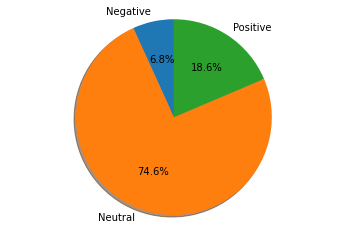

Overall Sentiment Score of text cleaned of stopwords
Negative: 13.1% Neutral: 59.4% Positive: 27.4% Compound: 1.0


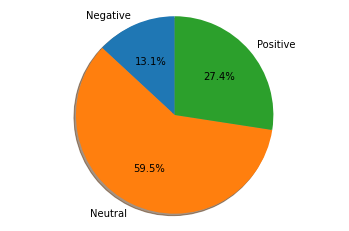

In [8]:
#Print and graph the resulting scores for raw text & text with stopwords removed
print("Overall Sentiment Score of raw text")
myScore = analyzeSentiment(textInput)
printScore(myScore)
pieChart(myScore)

print("Overall Sentiment Score of text cleaned of stopwords")
myScore = analyzeSentiment(removeStopwords(textInput))
printScore(myScore)
pieChart(myScore)

In [9]:
#Iteratively display sentiment scores for each sentence
print("-----Sentiment by Sentence-----\n")
for i in sentenceInput:
    print("Sentiment of sentence: ", i)
    printScore(analyzeSentiment(i))
    print()

-----Sentiment by Sentence-----

Sentiment of sentence:  Stop blushing.
Negative: 68.8% Neutral: 31.2% Positive: 0.0% Compound: -0.3

Sentiment of sentence:  I'm not needling, really I'm not.
Negative: 0.0% Neutral: 100.0% Positive: 0.0% Compound: 0.0

Sentiment of sentence:  Do you know, I had a dream an hour ago.
Negative: 0.0% Neutral: 77.8% Positive: 22.2% Compound: 0.2

Sentiment of sentence:  I lay down for a cat-nap and in this dream you and I, Montag, got into a furious debate on books.
Negative: 16.9% Neutral: 72.9% Positive: 10.3% Compound: -0.4

Sentiment of sentence:  You towered with rage, yelled quotes at me.
Negative: 34.0% Neutral: 66.0% Positive: 0.0% Compound: -0.6

Sentiment of sentence:  I calmly parried every thrust.
Negative: 0.0% Neutral: 56.6% Positive: 43.4% Compound: 0.3

Sentiment of sentence:  Power, I said, And you, quoting Dr. Johnson, said `Knowledge is more than equivalent to force!'
Negative: 0.0% Neutral: 100.0% Positive: 0.0% Compound: 0.0

Sentiment 